
# Assignment on Model Selection

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data Set

In [6]:
data=pd.read_csv('titanic_dataset.csv')

In [ ]:
#checking basic operations

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 12)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#unique value checking

In [13]:

data_uni= pd.DataFrame(data.nunique(),columns=['Unique Values'])
data_uni

,Unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [14]:
#Calcualting the Surivival rates in the dataset 


In [15]:
survived = data[data['Survived'] == 1]
deceased = data[data['Survived'] == 0]
sur=[len(survived)/len(data)*100.0,len(deceased)/len(data)*100.0]
print('Percentage of Survival and Deceased is',sur)

Percentage of Survival and Deceased is [38.38383838383838, 61.61616161616161]


In [16]:
#ploting Surivival rates

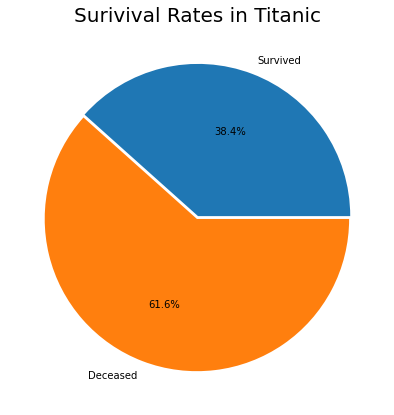

In [20]:
uni=['Survived','Deceased']
fig=plt.figure(figsize=(9,7))
plt.title('Surivival Rates in Titanic',size=20)
plt.pie(sur,labels=uni,autopct='%.1f%%',explode=[0.01]*2)
plt.show()

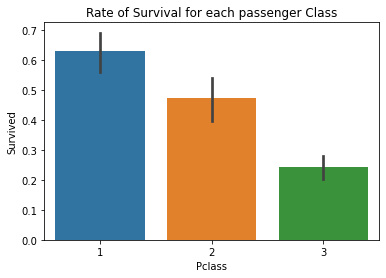

In [21]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Rate of Survival for each passenger Class')
plt.show()

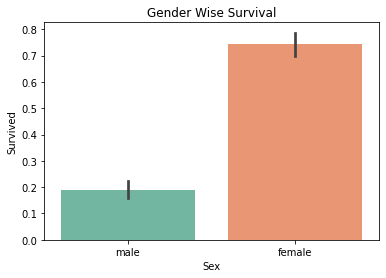

In [22]:
sns.barplot(x='Sex', y='Survived', data=data, palette='Set2')
plt.title('Gender Wise Survival')
plt.show()

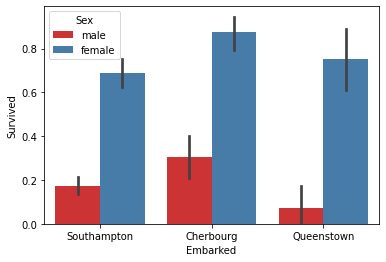

In [23]:
g=sns.barplot(x='Embarked', y='Survived',hue='Sex', data=data, palette='Set1')
labels = ['Southampton','Cherbourg','Queenstown']
g.set_xticklabels(labels)
plt.show()

# Pre-processing the Dataset

In [24]:
#Checking for Null values in the dataset


In [25]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
data.isna().sum()/data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [27]:
#Filling the missing values present in all the columns in the dataset

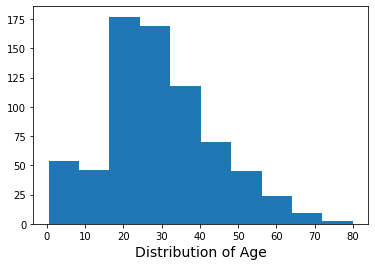

In [28]:
plt.hist(data['Age'])
plt.xlabel('Distribution of Age',size=14)
plt.show()

# 'Age'  is  skewed on right hand side 
hence uses Median to fill the null values

In [29]:
data["Age"]=data["Age"].fillna(data['Age'].median())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Embarked  is categorical  hencemode is used to fill in the values , Cabin  contains 687 null values therfore  cabin is dropped

In [30]:
data['Embarked']=data["Embarked"].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
data=data.drop('Cabin',axis=1)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:

data['Name'].nunique()

891

In [33]:
data['Ticket'].nunique()


681

In [34]:
# no of uniqe values in name : 891
# no of uniqe values in Ticket : 681


In [35]:
data=data.drop(['Name','Ticket'],axis=1)

In [36]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

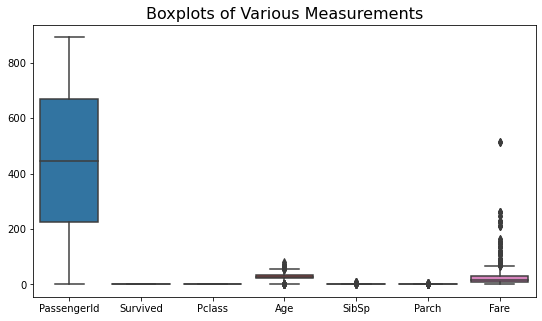

In [37]:
plt.figure(figsize=(9,5))
sns.boxplot(data=data)
plt.title('Boxplots of Various Measurements',fontsize=16)
plt.show()

In [38]:
#Age and Fare column contains outliers 

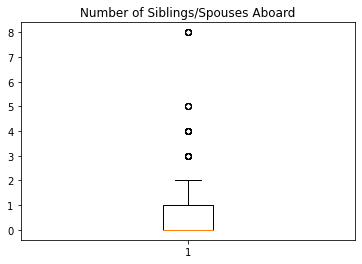

In [39]:
plt.boxplot(data['SibSp'])
plt.title('Number of Siblings/Spouses Aboard')
plt.show()


In [40]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

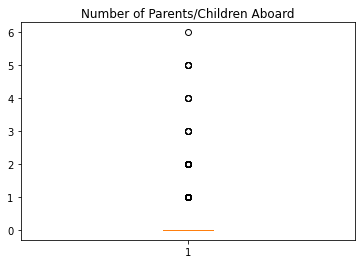

In [41]:
plt.boxplot(data['Parch'])
plt.title('Number of Parents/Children Aboard')
plt.show()

In [42]:
data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [43]:
#Sibsp column and Parch column contains few outliers.

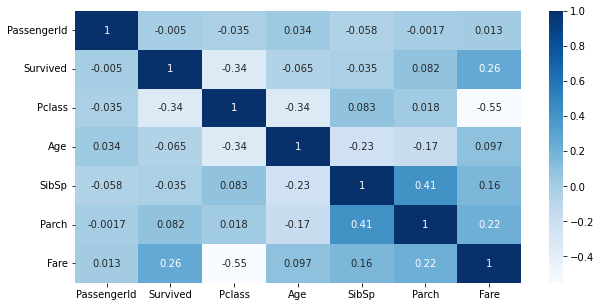

In [44]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmin=-0.55,vmax=1,cmap='Blues')
plt.show()

In [45]:
#Maximum co-relation : 0.41 and minimum value :-0.55

In [46]:
data['Family_mem']=data['SibSp']+data['Parch']

In [47]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_mem
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [48]:
# 'Sex' and 'Embarked' are categorical columns

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_mem
0,1,0,3,1,22.0,7.2500,2,1
1,2,1,1,0,38.0,71.2833,0,1
2,3,1,3,0,26.0,7.9250,2,0
3,4,1,1,0,35.0,53.1000,2,1
4,5,0,3,1,35.0,8.0500,2,0


# MODEL CREATION

In [51]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [52]:
from sklearn import preprocessing

In [53]:
std_scl=preprocessing.StandardScaler()
X1=std_scl.fit_transform(X)

In [54]:
X1=pd.DataFrame(X1,columns=X.columns)

In [55]:
X1.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_mem
0,-1.730108,0.827377,0.737695,-0.565736,-0.502445,0.585954,0.059160
1,-1.726220,-1.566107,-1.355574,0.663861,0.786845,-1.942303,0.059160
2,-1.722332,0.827377,-1.355574,-0.258337,-0.488854,0.585954,-0.560975
3,-1.718444,-1.566107,-1.355574,0.433312,0.420730,0.585954,0.059160
4,-1.714556,0.827377,0.737695,0.433312,-0.486337,0.585954,-0.560975


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix

# kNN Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
metric_k=[]
neighbors=range(1,17)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    model1=classifier.fit(X_train,Y_train)
    y_knn=model1.predict(X_test)
    acc=accuracy_score(Y_test,y_knn)
    metric_k.append(acc)

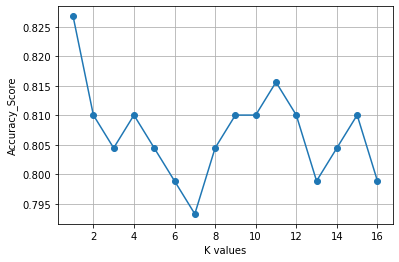

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K values')
plt.ylabel("Accuracy_Score")
plt.grid()


# Maximum accuracy at k=11

In [62]:
kNN=KNeighborsClassifier(n_neighbors=11)
model1=kNN.fit(X_train,Y_train)
y_KNN_pred=model1.predict(X_test)
acc2=accuracy_score(Y_test,y_KNN_pred)
print('Accracy score of kNN Model at k=11 is:',acc2)


Accracy score of kNN Model at k=11 is: 0.8156424581005587


In [63]:
confusion_matrix(Y_test,y_KNN_pred)


array([[93, 12],
       [21, 53]], dtype=int64)

# SVM-Linear Kernel

In [64]:
from sklearn.svm import SVC

In [65]:
clf_svm1=SVC(kernel="linear")
model2=clf_svm1.fit(X_train,Y_train)
y_svm1=model2.predict(X_test)

In [66]:
confusion_matrix(Y_test,y_svm1)

array([[88, 17],
       [22, 52]], dtype=int64)

In [67]:
acc3=accuracy_score(Y_test,y_svm1)
print('Accracy score of SVM-Linear Model is:',acc3)

Accracy score of SVM-Linear Model is: 0.7821229050279329


# SVM-RBF Kernel

In [68]:
clf_svm2=SVC(kernel='rbf')
model3=clf_svm2.fit(X_train,Y_train)
y_svm2=model3.predict(X_test)

In [69]:
confusion_matrix(Y_test,y_svm2)

array([[93, 12],
       [21, 53]], dtype=int64)

In [70]:
acc4=accuracy_score(Y_test,y_svm2)
print('Accracy score of SVM-RBF Model is:',acc4)


Accracy score of SVM-RBF Model is: 0.8156424581005587


# KFold Cross Validation

In [71]:
from sklearn.model_selection import KFold


In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)

In [73]:
kfoldvalidator=KFold(10)

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cv_result=cross_val_score(model1,X1,Y,cv=kfoldvalidator)
cv_result

array([0.84444444, 0.85393258, 0.78651685, 0.84269663, 0.80898876,
       0.80898876, 0.79775281, 0.74157303, 0.85393258, 0.83146067])

In [76]:
cv1=np.mean(cv_result)
print('Average KFold Cross Validation score of kNN Model is:',cv1)

Average KFold Cross Validation score of kNN Model is: 0.8170287141073658


In [77]:
cv_result2=cross_val_score(model2,X1,Y,cv=kfoldvalidator)
cv_result2

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [78]:
cv2=np.mean(cv_result2)
print('Average KFold Cross Validation score of SVM-Linear Model is:',cv2)

Average KFold Cross Validation score of SVM-Linear Model is: 0.786729088639201


In [79]:
cv_result3=cross_val_score(model3,X1,Y,cv=kfoldvalidator)
cv_result3

array([0.8       , 0.85393258, 0.79775281, 0.85393258, 0.80898876,
       0.79775281, 0.78651685, 0.7752809 , 0.86516854, 0.83146067])

In [80]:
cv3=np.mean(cv_result3)
print('Average KFold Cross Validation score of SVM-RBF Model is:',cv3)

Average KFold Cross Validation score of SVM-RBF Model is: 0.8170786516853932


In [81]:
from sklearn.model_selection import StratifiedKFold 

In [82]:
Stratifiedvalidator=StratifiedKFold(n_splits=10)

In [83]:
scv_result1=cross_val_score(model1,X1,Y,cv=Stratifiedvalidator)
scv_result1

array([0.83333333, 0.78651685, 0.7752809 , 0.84269663, 0.82022472,
       0.79775281, 0.82022472, 0.7752809 , 0.83146067, 0.85393258])

In [84]:
scv1=np.mean(scv_result1)
print("Average Stratified K Fold Cross validation score of kNN Model is:",scv1)

Average Stratified K Fold Cross validation score of kNN Model is: 0.8136704119850187


In [85]:
scv_result2=cross_val_score(model2,X1,Y,cv=Stratifiedvalidator)
scv_result2

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [86]:
scv2=np.mean(scv_result2)
print("Average Stratified K Fold Cross validation score of SVM-LInear Model is:",scv2)

Average Stratified K Fold Cross validation score of SVM-LInear Model is: 0.786729088639201


In [87]:
scv_result3=cross_val_score(model3,X1,Y,cv=Stratifiedvalidator)
scv_result3

array([0.81111111, 0.79775281, 0.76404494, 0.88764045, 0.83146067,
       0.78651685, 0.80898876, 0.7752809 , 0.84269663, 0.82022472])

In [88]:
scv3=np.mean(scv_result3)
print("Average Stratified K Fold Cross validation score of SVM-RBF Model is:",scv3)

Average Stratified K Fold Cross validation score of SVM-RBF Model is: 0.8125717852684146


In [89]:
score={'Model Name':['kNN','SVM-Linear','SVM-RBF',],'Accuracy score':[acc2,acc3,acc4],'KFold CV Score':[cv1,cv2,cv3],'Stratified-KFold CV Score':[scv1,scv2,scv3]}
df=pd.DataFrame(score)
df=df.set_index('Model Name')
df

,Accuracy score,KFold CV Score,Stratified-KFold CV Score
Model Name,,,
kNN,0.815642,0.817029,0.813670
SVM-Linear,0.782123,0.786729,0.786729
SVM-RBF,0.815642,0.817079,0.812572
